# WEEK 14 (29/01/18)

### Done


### To Do
* RUN EVERYTHING ON SMALLER SYSTEM TO MAKE SURE THERE'S NOTHING WRONG WITH THE CODE
* Analyse the mass dependency of $\epsilon$ from the plots
* Start clustering cities together to see if flow is different at intra-city and inter-city level

### Questions
* <font color='RED'> Why is epsilon negative?</font> 

## 1 Analysis on small system

Let's create a very small population with m = 1 to find exactly why epsilon goes negative.

In [6]:
%load_ext autoreload
%autoreload 2

In [6]:
from hm.pop_models import pop_random, population
from hm.analysis.scaling.pop_hierarchy import pop_hier
from hm.analysis.scaling.plots import eps_distance
import hm.analysis.scaling.eps_scale
from matplotlib import pyplot as plt
import pandas

In [155]:
pop = pop_random.random(2000)

In [164]:
gamma = 3

In [165]:
h = pop_hier(pop, [0.1, 0.2, 0.3, 0.4, 0.5])
odm_0 = h.gravity_ODM(0, gamma)
odm_1 = h.gravity_ODM(1, gamma)
odm_2 = h.gravity_ODM(2, gamma)
odm_3 = h.gravity_ODM(3, gamma)
odm_4 = h.gravity_ODM(4, gamma)
odm_5 = h.gravity_ODM(5, gamma)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [94]:
import seaborn as sns; sns.set()

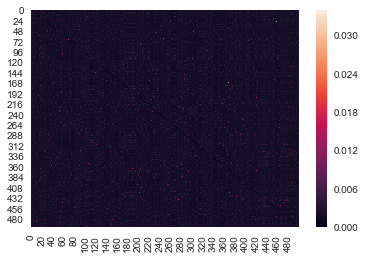

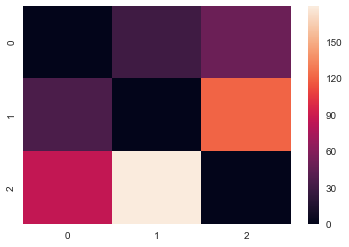

In [123]:
sns.heatmap(odm_0)
plt.show()

sns.heatmap(odm_5)
plt.show()

In [166]:
eps_1 = h.epsilon(1, gamma=gamma)
eps_2 = h.epsilon(2, gamma=gamma)
eps_3 = h.epsilon(3, gamma=gamma)
eps_4 = h.epsilon(4, gamma=gamma)
eps_5 = h.epsilon(5, gamma=gamma)

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

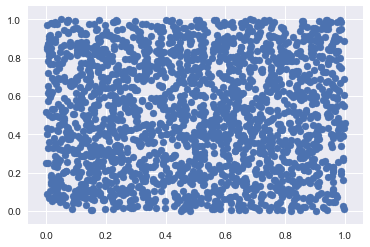

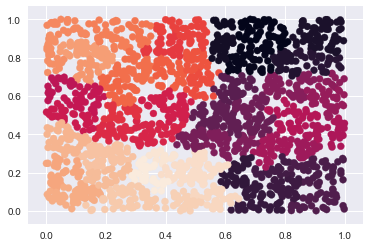

In [167]:
plt.scatter(pop.locCoords.T[0], pop.locCoords.T[1])
plt.show()
level_1 = h.levels[0]
level_1.viz_clusters()

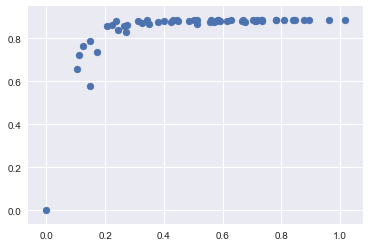

In [168]:
# df = pandas.DataFrame(eps_1)
df
#let's try plotting individual locations e.g. loc 0
x = h.DM_level(1)[10][1:]
y = eps_1[10][1:]
plt.scatter(x, y)
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


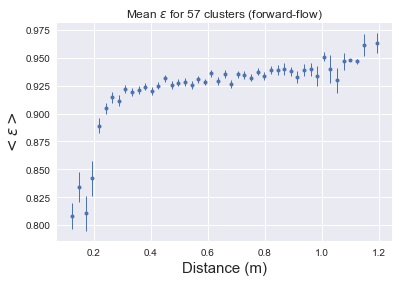

In [174]:
N = 50
DM = h.DM_level(1)
eps_distance(eps_1, DM, N)